## 실습 1: 사람 키로 몸무게 예측
### 1) 사람 키와 몸무게 두 변수에 대한 산점도 그리기
### 2) 사람 키(키) 데이터를 가지고 몸무게를 예측하는 선형 회귀모형 만들어보기 (train_data : test_data = 7:3 split)
### 3) 회귀식의 기울기와 y 절편 구하기
### 4) R^2, MSE 계산하기

In [75]:
import warnings

warnings.filterwarnings(action='ignore')

In [76]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv("./data/student.csv", encoding="euc-kr")

df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [78]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9686 non-null   object 
 1   최종가중치       9686 non-null   float64
 2   학교ID        9686 non-null   object 
 3   도시규모        9686 non-null   object 
 4   도시규모별분석용    9686 non-null   object 
 5   학년도         9686 non-null   int64  
 6   광역시도        9686 non-null   object 
 7   시도별         9686 non-null   object 
 8   학교급별        9686 non-null   int64  
 9   학교명         9686 non-null   object 
 10  공학여부        9686 non-null   object 
 11  학년          9686 non-null   int64  
 12  반           9686 non-null   int64  
 13  성별          9686 non-null   object 
 14  건강검진일       9686 non-null   int64  
 15  키           9686 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

In [79]:
height_and_weight = df[["키", "몸무게"]]
height_and_weight

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5
...,...,...
9681,176.1,50.4
9682,174.1,88.8
9683,169.5,63.2
9684,159.2,52.9


In [80]:
print(height_and_weight.info())
print(height_and_weight.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   키       9686 non-null   float64
 1   몸무게     9682 non-null   float64
dtypes: float64(2)
memory usage: 151.5 KB
None
키      0
몸무게    4
dtype: int64


In [81]:
# 몸무게에 null값 존재. null값 drop

height_and_weight.dropna(subset=["몸무게"], axis=0, inplace=True)

height_and_weight.describe()

,키,몸무게
count,9682.000000,9682.000000
mean,154.564832,50.207591
std,16.971475,17.075953
min,107.700000,15.900000
25%,142.000000,37.200000
50%,158.700000,50.700000
75%,167.200000,60.600000
max,194.200000,130.700000


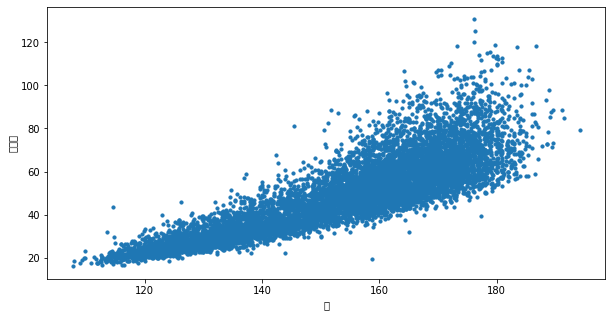

In [82]:
height_and_weight.plot(kind="scatter", x="키", y="몸무게", s=10, figsize=(10, 5))
plt.show()

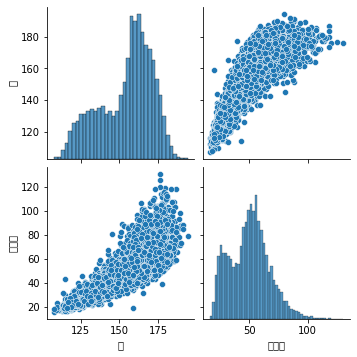

In [83]:
grid_height_and_weight = sns.pairplot(height_and_weight)
plt.show()

In [84]:
X = height_and_weight[["키"]]
Y = height_and_weight["몸무게"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("train data :", X_train.shape)
print("test data :", X_test.shape)

train data : (6777, 1)
test data : (2905, 1)


In [85]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [86]:
print("기울기 : ", lr.coef_)
print("y절편 : ", lr.intercept_)

기울기 :  [0.84858763]
y절편 :  -80.99967162929156


In [87]:
Y_pred = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r_square = r2_score(Y_test, Y_pred)

print("MSE :", mse)
print("R^2 :", r_square)

MSE : 80.49959418857723
R^2 : 0.7274670203355789


## 실습 2: 보스톤 집값 예측 모델
### 1) 주택 방 수와 집값 두 변수에 대한 산점도 그리기
### 2) 주택당 방 수(RM) 데이터를 가지고 집값(Target) 예측하는 선형 회귀모형 만들어보기 (train_data : test_data = 7:3 split)
### 3) 회귀식의 기울기와 y 절편 구하기
### 4)  R^2, MSE 계산하기

**타겟 변수**  
>Target: 1978년도 보스턴 주택 가격  
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)   

  
**특성 변수**  
>CRIM: 범죄율  
INDUS: 비소매상업지역 면적 비율  
NOX: 일산화질소 농도  
RM: 주택당 방 수  
LSTAT: 인구 중 하위 계층 비율  
B: 인구 중 흑인 비율  
PTRATIO: 학생/교사 비율  
ZN: 25,000 평방피트를 초과 거주지역 비율  
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
AGE: 1940년 이전에 건축된 주택의 비율  
RAD: 방사형 고속도로까지의 거리  
DIS: 직업센터의 거리  
TAX: 재산세율  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [88]:
df2 = pd.read_csv("./data/Boston_house.csv")

df2.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [89]:
df2.shape

(506, 14)

In [90]:
RM_and_Target = df2[["RM", "Target"]]

RM_and_Target

,RM,Target
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [91]:
print(RM_and_Target.info())
print(RM_and_Target.isnull().sum())

# null value 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   Target  506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB
None
RM        0
Target    0
dtype: int64


In [92]:
RM_and_Target.describe()

,RM,Target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


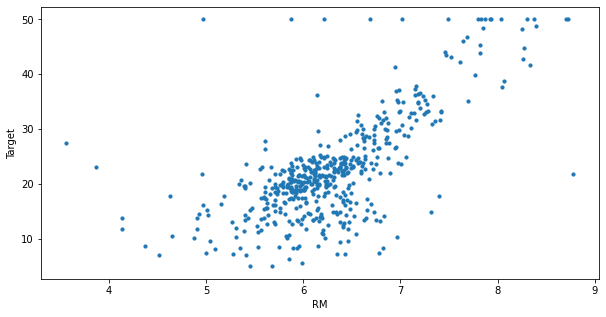

In [93]:
RM_and_Target.plot(kind="scatter", x="RM", y="Target", s=10, figsize=(10, 5))
plt.show()

In [94]:
X2 = RM_and_Target[["RM"]]
Y2 = RM_and_Target["Target"]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

print("train data :", X2_train.shape)
print("test data :", X2_test.shape)

train data : (354, 1)
test data : (152, 1)


In [95]:
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)

LinearRegression()

In [96]:
print("기울기 :", lr2.coef_)
print("y절편 :", lr2.intercept_)

기울기 : [9.1181022]
y절편 : -34.662307438406785


In [97]:
Y2_pred = lr2.predict(X2_test)

mse2 = mean_squared_error(Y2_test, Y2_pred)
r_square2 = r2_score(Y2_test, Y2_pred)

print("mse :", mse2)
print("R^2 :", r_square2)

mse : 40.35144969787305
R^2 : 0.4584649934303068
